# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": pd.to_datetime(city_date, unit="s")
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | tofol
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | lata
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | keflavik
Processing Record 22 of Set 1 | puerto nat

In [8]:
# Check the contents of city_data
print(f"Total cities retrieved: {len(city_data)}")
print(city_data)  


Total cities retrieved: 549
[{'City': 'talnakh', 'Lat': 69.4865, 'Lng': 88.3972, 'Max Temp': -12.31, 'Humidity': 95, 'Cloudiness': 100, 'Wind Speed': 3.85, 'Country': 'RU', 'Date': Timestamp('2025-03-06 02:45:36')}, {'City': 'tofol', 'Lat': 5.3248, 'Lng': 163.0078, 'Max Temp': 28.23, 'Humidity': 71, 'Cloudiness': 100, 'Wind Speed': 10.19, 'Country': 'FM', 'Date': Timestamp('2025-03-06 02:45:38')}, {'City': 'albany', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 10.36, 'Humidity': 93, 'Cloudiness': 100, 'Wind Speed': 1.79, 'Country': 'US', 'Date': Timestamp('2025-03-06 02:45:39')}, {'City': 'bethel', 'Lat': 41.3712, 'Lng': -73.414, 'Max Temp': 10.36, 'Humidity': 91, 'Cloudiness': 100, 'Wind Speed': 1.34, 'Country': 'US', 'Date': Timestamp('2025-03-06 02:45:40')}, {'City': 'vorgashor', 'Lat': 67.5833, 'Lng': 63.95, 'Max Temp': -20.94, 'Humidity': 100, 'Cloudiness': 93, 'Wind Speed': 2.28, 'Country': 'RU', 'Date': Timestamp('2025-03-06 02:45:18')}, {'City': 'port-aux-francais', 'Lat': -49.

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-12.31,95,100,3.85,RU,2025-03-06 02:45:36
1,tofol,5.3248,163.0078,28.23,71,100,10.19,FM,2025-03-06 02:45:38
2,albany,42.6001,-73.9662,10.36,93,100,1.79,US,2025-03-06 02:45:39
3,bethel,41.3712,-73.4140,10.36,91,100,1.34,US,2025-03-06 02:45:40
4,vorgashor,67.5833,63.9500,-20.94,100,93,2.28,RU,2025-03-06 02:45:18


In [11]:

os.makedirs("output_data", exist_ok=True)

In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-12.31,95,100,3.85,RU,2025-03-06 02:45:36
1,tofol,5.3248,163.0078,28.23,71,100,10.19,FM,2025-03-06 02:45:38
2,albany,42.6001,-73.9662,10.36,93,100,1.79,US,2025-03-06 02:45:39
3,bethel,41.3712,-73.4140,10.36,91,100,1.34,US,2025-03-06 02:45:40
4,vorgashor,67.5833,63.9500,-20.94,100,93,2.28,RU,2025-03-06 02:45:18


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

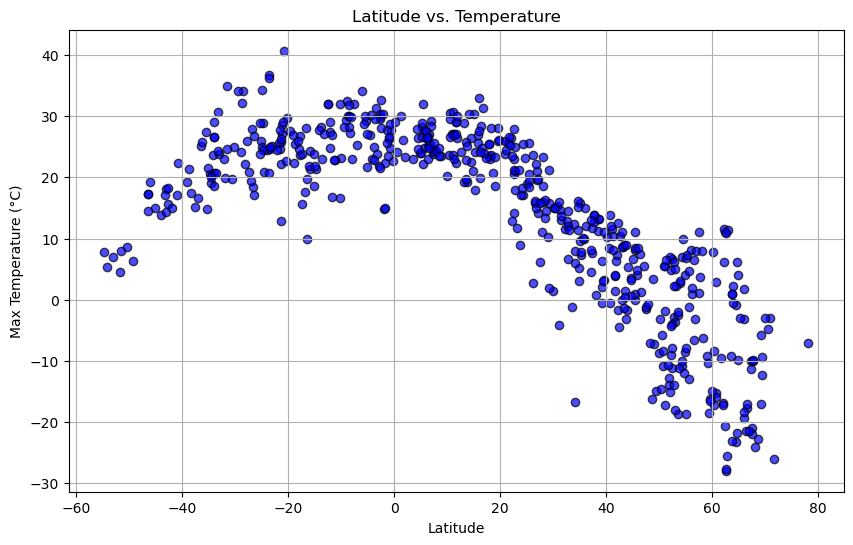

In [15]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', edgecolors='k', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
plt.title('Latitude vs. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

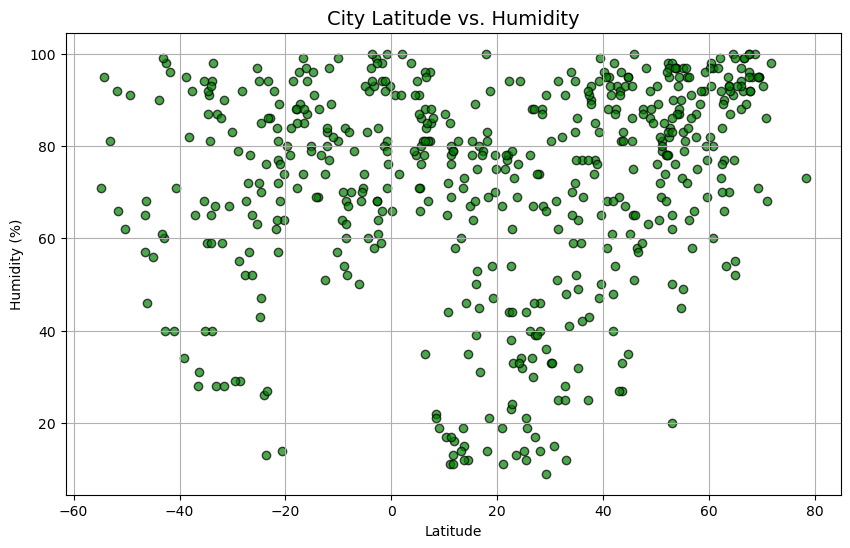

In [17]:
# Latitude vs. Humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='green', edgecolors='k', alpha=0.7)

# Incorporate the other graph propertie
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

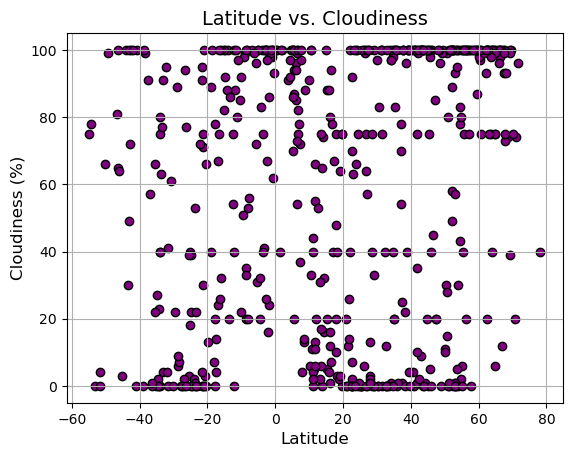

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color='Purple', edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

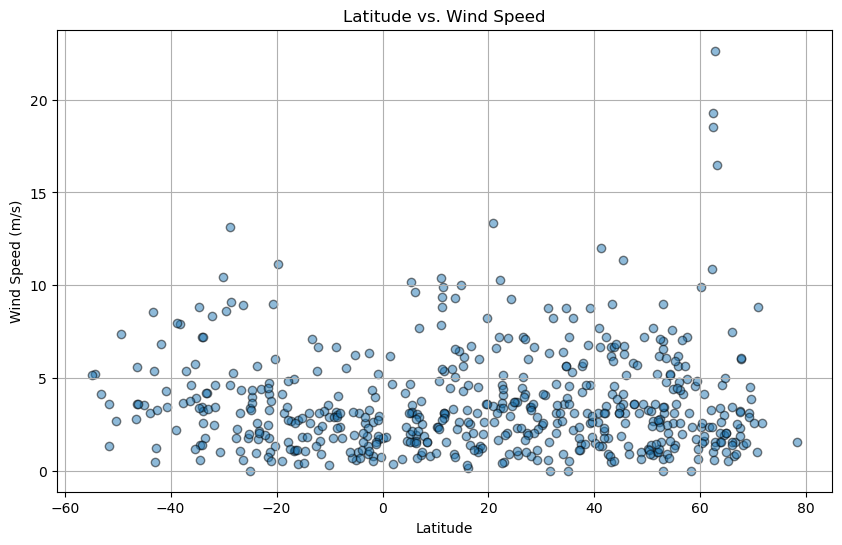

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df['Wind Speed'], marker='o', edgecolors='k', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, xlabel, ylabel, title, fig_filename):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)

     
    # Calculate R-squared value
    r_squared = r_value ** 2
    
    # Create regression line
    regression_line = slope * x_data + intercept

    # Plot data
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', edgecolors='k', alpha=0.7)
    plt.plot(x_data, regression_line, color='red', label='Regression Line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(fig_filename)
    plt.show()
    
    # Return regression parameters for discussion
    return slope, intercept, r_value, p_value, std_err



In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-12.31,95,100,3.85,RU,2025-03-06 02:45:36
1,tofol,5.3248,163.0078,28.23,71,100,10.19,FM,2025-03-06 02:45:38
2,albany,42.6001,-73.9662,10.36,93,100,1.79,US,2025-03-06 02:45:39
3,bethel,41.3712,-73.4140,10.36,91,100,1.34,US,2025-03-06 02:45:40
4,vorgashor,67.5833,63.9500,-20.94,100,93,2.28,RU,2025-03-06 02:45:18


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,6.31,91,99,7.38,TF,2025-03-06 02:44:56
7,saint-pierre,-21.3393,55.4781,25.82,57,0,4.12,RE,2025-03-06 02:45:44
8,edinburgh of the seven seas,-37.0676,-12.3116,16.60,65,57,5.36,SH,2025-03-06 02:45:19
9,blackmans bay,-43.0167,147.3167,18.07,60,49,0.45,AU,2025-03-06 02:45:46
10,grytviken,-54.2811,-36.5092,5.34,95,78,5.19,GS,2025-03-06 02:44:55


###  Temperature vs. Latitude Linear Regression Plot

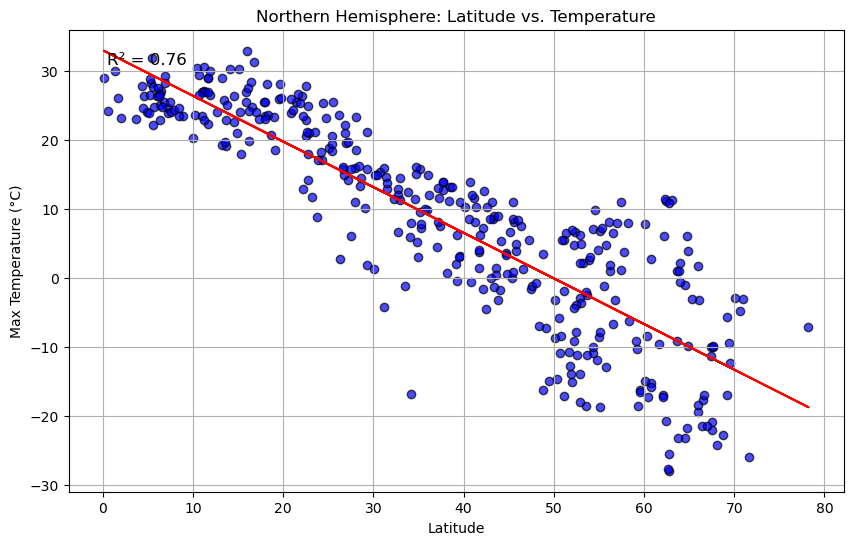

R-squared: 0.7639694201123223


In [51]:
# # Linear regression on Northern Hemisphere
northern_slope, northern_intercept, northern_r_value, northern_r_squared, northern_p_value, northern_std_err = create_linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Max Temperature (°C)', 
    'Northern Hemisphere: Latitude vs. Temperature', "output_data/Fig5_Northern_Temperature.png")

# print the R-squared value
print(f"R-squared: {northern_r_squared}")


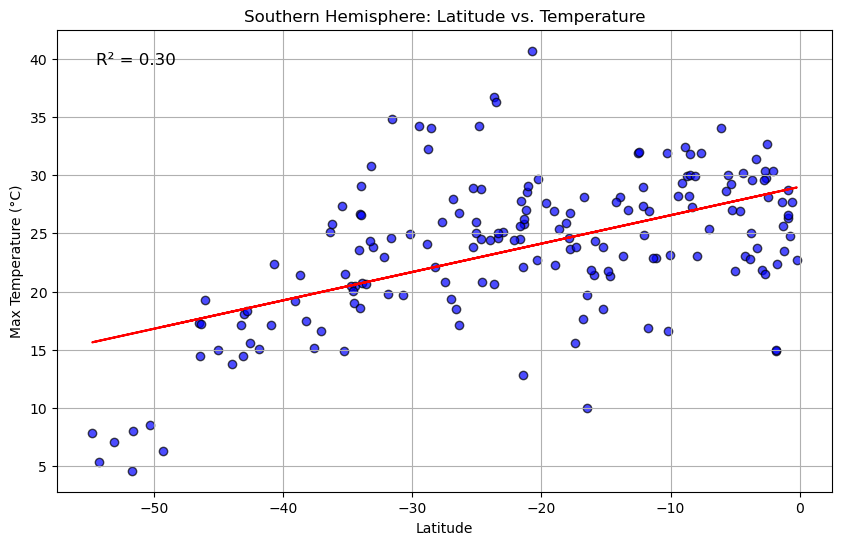

Southern Hemisphere R-squared: 0.2997577820671103


In [ ]:
# Linear regression on Southern Hemisphere
southern_slope, southern_intercept, southern_r_value, southern_r_squared, southern_p_value, southern_std_err = create_linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Max Temperature (°C)', 
    'Southern Hemisphere: Latitude vs. Temperature', "output_data/Fig5_Southern_Temperature.png")

#  print the R-squared value for Southern Hemisphere
print(f"Southern Hemisphere R-squared: {southern_r_squared}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE


The linear regression analysis for the Northern Hemisphere shows an R-squared value of 0.764. This indicates a moderately strong positive linear relationship between latitude and maximum temperature.

The opposite trend is observed in the Southern Hemisphere. The Southern Hemisphere exhibits a much lower R-squared value of 0.300. This suggest a weak positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

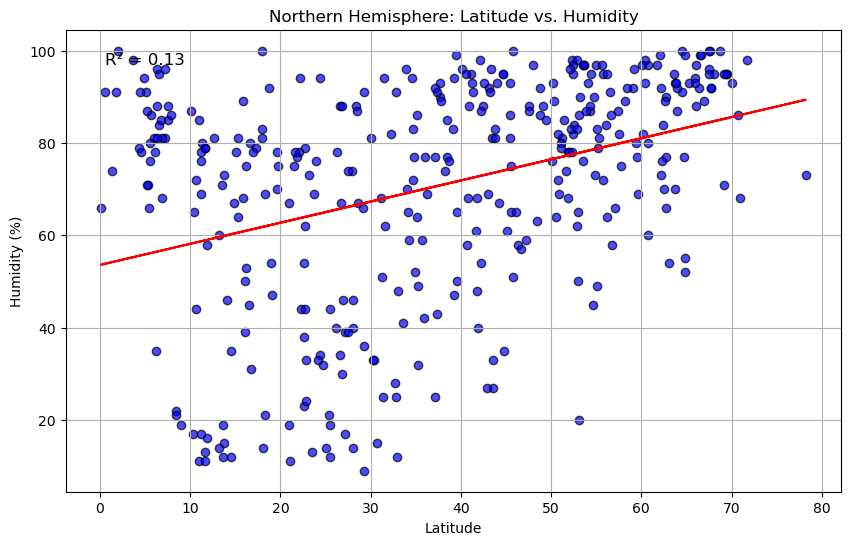

Northern Hemisphere R-squared: 0.13313766679436148


In [66]:
# Northern Hemisphere
northern_slope, northern_intercept, northern_r_value, northern_r_squared, northern_p_value, northern_std_err = create_linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Latitude', 'Humidity (%)', 
    'Northern Hemisphere: Latitude vs. Humidity', "output_data/Fig6_Northern_Humidity.png")

# Print the R-squared value
print(f"Northern Hemisphere R-squared: {northern_r_squared}")




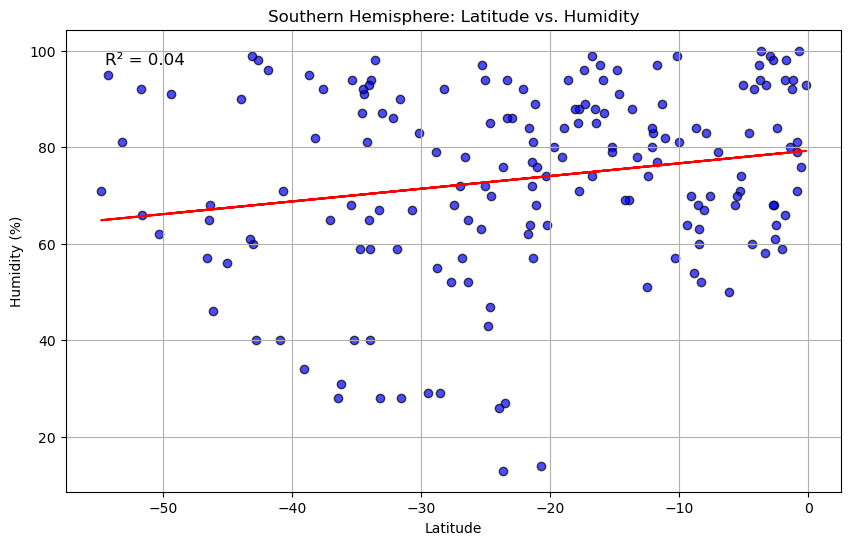

Southern Hemisphere R-squared: 0.03748442412032521


In [67]:
# Southern Hemisphere
southern_slope, southern_intercept, southern_r_value, southern_r_squared, southern_p_value, southern_std_err = create_linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Latitude', 'Humidity (%)', 
    'Southern Hemisphere: Latitude vs. Humidity', "output_data/Fig6_Southern_Humidity.png")

# Print the R-value (correlation coefficient)
print(f"Southern Hemisphere R-squared: {southern_r_squared}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE


The R-squared value of 0.133 for the Northern Hemisphere indicates a weak linear relationship between latitude and humidity. The R-squared value of 0.037 for the Southern Hemisphere is even smaller indicating an even weaker linear relationship than that observed in the Northern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

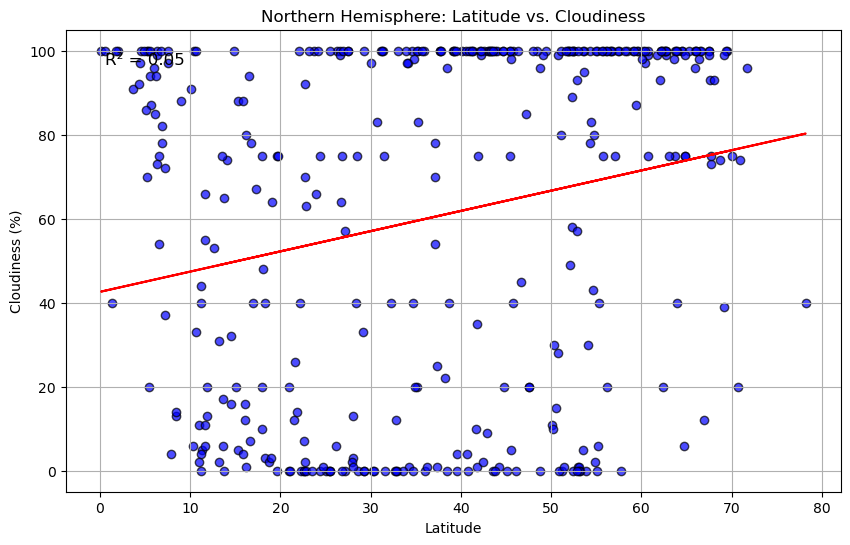

Northern Hemisphere R-squared: 0.05214924518211445


In [ ]:
# Northern Hemisphere
northern_slope, northern_intercept, northern_r_value, northern_r_squared, northern_p_value, northern_std_err = create_linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness (%)', 
    'Northern Hemisphere: Latitude vs. Cloudiness', "output_data/Fig7_Northern_Cloudiness.png")

# Print the R-squared value for Northern Hemisphere
print(f"Northern Hemisphere R-squared: {northern_r_squared}")


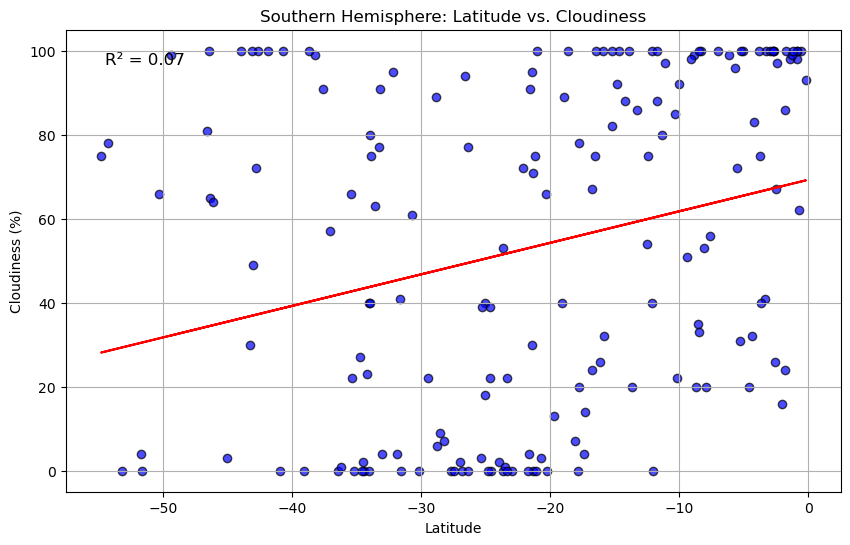

Southern Hemisphere R-squared: 0.074359801808525


In [69]:
# Southern Hemisphere
southern_slope, southern_intercept, southern_r_value, southern_r_squared, southern_p_value, southern_std_err = create_linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness (%)', 
    'Southern Hemisphere: Latitude vs. Cloudiness', "output_data/Fig7_Southern_Cloudiness.png")

# Print the R-squared value for Southern Hemisphere
print(f"Southern Hemisphere R-squared: {southern_r_squared}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Cloudiness does not show a strong linear relationship with latitude in either hemisphere. Indicated by both lopw R squared values. 

### Wind Speed vs. Latitude Linear Regression Plot

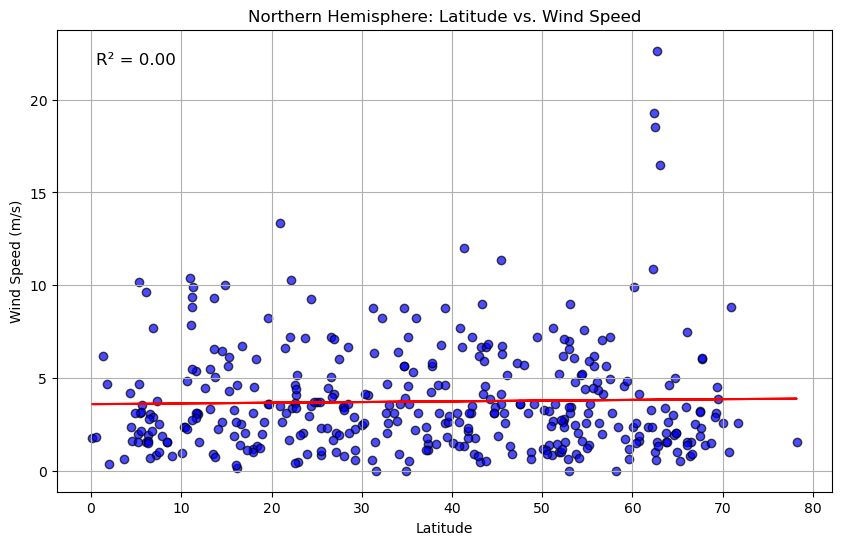

Northern Hemisphere R-squared: 0.000645630182166964


In [70]:
# Northern Hemisphere
northern_slope, northern_intercept, northern_r_value, northern_r_squared, northern_p_value, northern_std_err = create_linear_regression_plot(
    northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)', 
    'Northern Hemisphere: Latitude vs. Wind Speed', "output_data/Fig8_Northern_WindSpeed.png")

# Print the R-squared value for Northern Hemisphere
print(f"Northern Hemisphere R-squared: {northern_r_squared}")



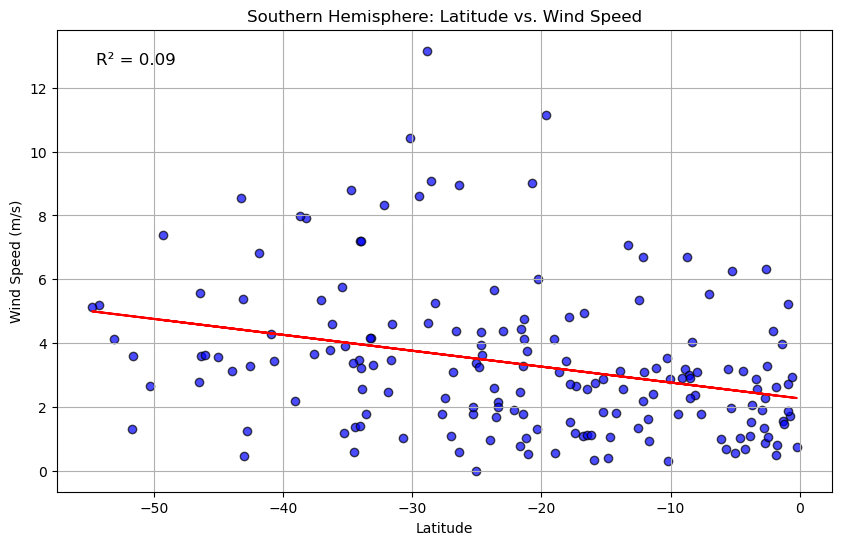

Southern Hemisphere R-squared: 0.09120329537877353


In [71]:
# Southern Hemisphere
southern_slope, southern_intercept, southern_r_value, southern_r_squared, southern_p_value, southern_std_err = create_linear_regression_plot(
    southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)', 
    'Southern Hemisphere: Latitude vs. Wind Speed', "output_data/Fig8_Southern_WindSpeed.png")

# Print the R-squared value for Southern Hemisphere
print(f"Southern Hemisphere R-squared: {southern_r_squared}")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

For the Northern Hemispere the R squared value is extremely low and indicates that latitude has an almost negligible effect on wind speed in the Northern Hemisphere. The R-squared value of 0.091 for the Southern Hemisphere indicates a slightly stronger linear relationship between latitude and wind speed in the Southern Hemisphere. However, both are weak positive correlations. 
